--- Successfully loaded data using header from file ---

--- Standardized Column Names ---
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

--- Unique 'ca' values BEFORE mapping ---
['Two' 'Zero' 'One' 'Three' 'Four']
--- Unique 'ca' values AFTER mapping ---
[ 2.  0.  1.  3. nan]

--- Data Info After All Conversions ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null

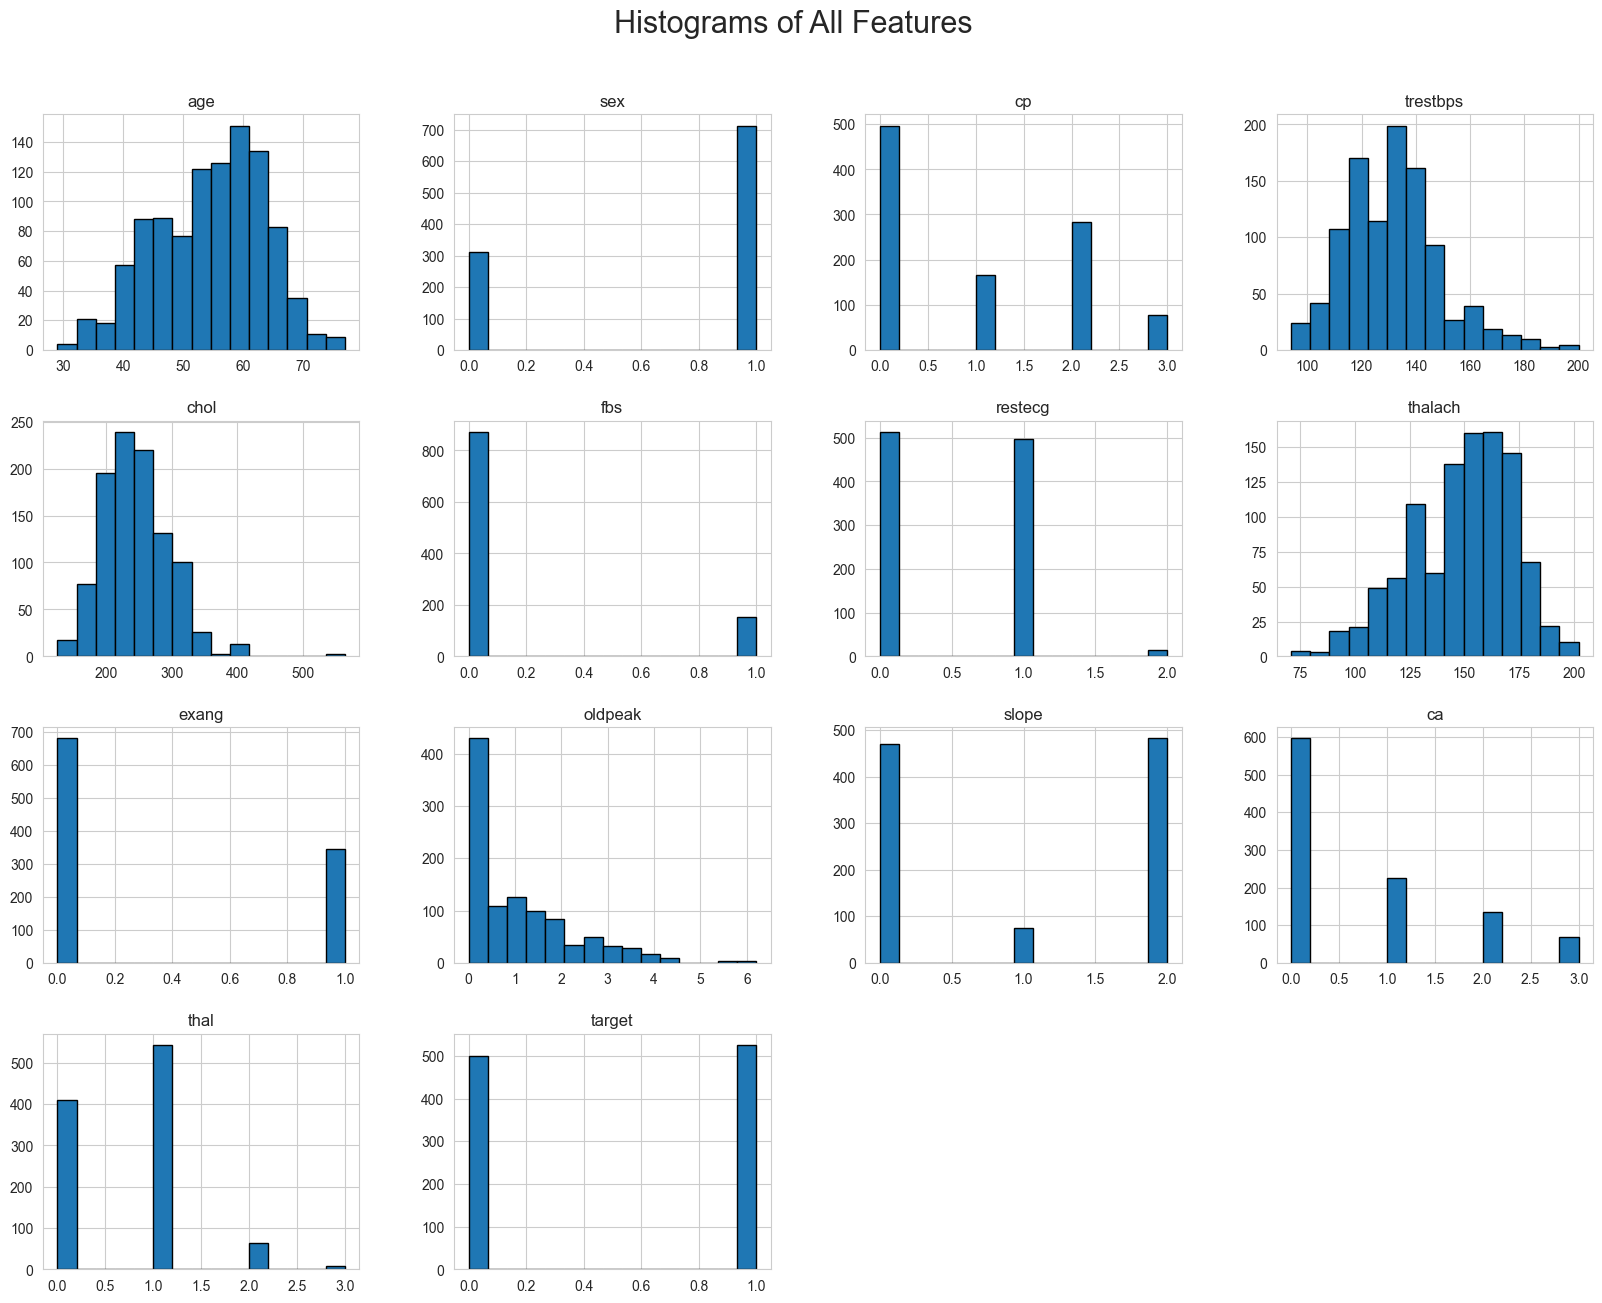

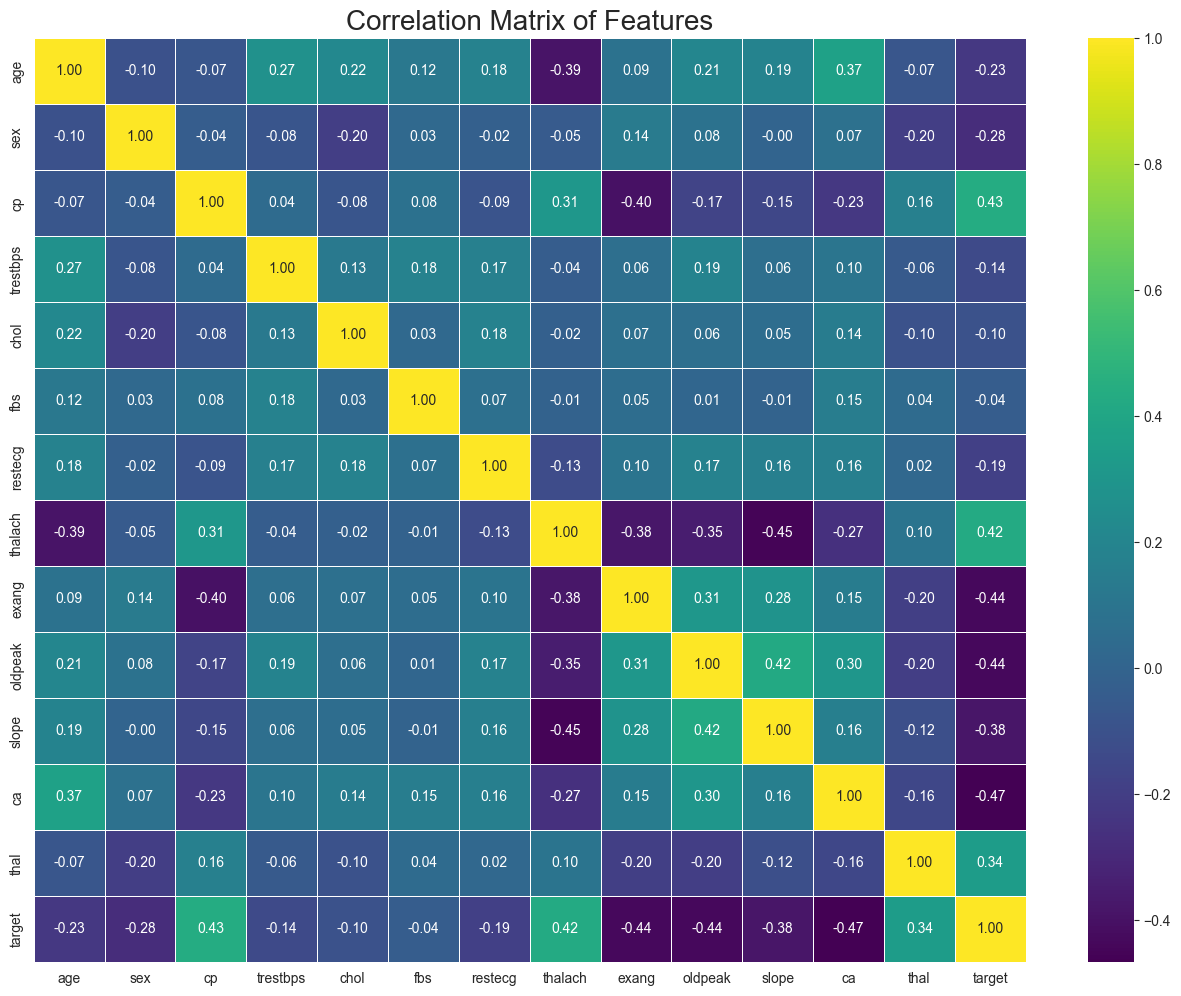


--- Cleaned data saved successfully. ---
Final Data Head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        0      168      0      1.0      0   
1   53    1   0       140   203    1        1      155      1      3.1      1   
2   70    1   0       145   174    0        0      125      1      2.6      1   
3   61    1   0       148   203    0        0      161      0      0.0      0   
4   62    0   0       138   294    1        0      106      0      1.9      2   

    ca  thal  target  
0  2.0     0       0  
1  0.0     0       0  
2  0.0     0       0  
3  1.0     0       0  
4  3.0     1       0  


In [38]:
# --- Cell 1: Imports and Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cell 2: Load Data and Standardize Columns ---
try:
    # Load the data, assuming the first row is the header
    df = pd.read_csv('../data/heart_disease.csv')
    print("--- Successfully loaded data using header from file ---")
except FileNotFoundError:
    print("Error: 'heart_disease.csv' not found in the 'data' directory.")
    raise

# Standardize column names
column_mapping = {
    'chest_pain_type': 'cp', 'resting_blood_pressure': 'trestbps',
    'cholestoral': 'chol', 'fasting_blood_sugar': 'fbs',
    'rest_ecg': 'restecg', 'Max_heart_rate': 'thalach',
    'exercise_induced_angina': 'exang', 'vessels_colored_by_flourosopy': 'ca',
    'thalassemia': 'thal'
}
df.rename(columns=column_mapping, inplace=True)
print("\n--- Standardized Column Names ---")
print(df.columns.tolist())

# --- Cell 3: Manual Correction for 'ca' Column ---
# Convert number words ('Zero', 'One', etc.) to actual numbers.
number_word_map = { 'Zero': 0, 'One': 1, 'Two': 2, 'Three': 3 }

print("\n--- Unique 'ca' values BEFORE mapping ---")
print(df['ca'].unique())

# Apply the mapping to the 'ca' column
df['ca'] = df['ca'].map(number_word_map)

print("--- Unique 'ca' values AFTER mapping ---")
print(df['ca'].unique())


# --- Cell 4: General Data Cleaning and Conversion ---
# Replace the placeholder '?' with NaN
df.replace('?', np.nan, inplace=True)

# Map other known text values to numbers
if 'sex' in df.columns:
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
if 'fbs' in df.columns:
    df['fbs'] = df['fbs'].map({'Greater than 120 mg/ml': 1, 'Lower than 120 mg/ml': 0})
for col in ['cp', 'restecg', 'exang', 'slope', 'thal']:
    if col in df.columns and df[col].dtype == 'object':
        df[col], _ = pd.factorize(df[col])

# Convert all columns to numeric types, coercing any remaining errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')
print("\n--- Data Info After All Conversions ---")
df.info()

# --- Cell 5: Final Imputation ---
print("\n--- Missing Values Before Imputation ---")
initial_nans = df.isnull().sum()
print(initial_nans[initial_nans > 0])

# Impute any remaining NaNs with the median value of their respective column
df.fillna(df.median(), inplace=True)
print("\n--- Missing Values After Imputation ---")
print(f"Total remaining missing values: {df.isnull().sum().sum()}")


# --- Cell 6: Target Variable Transformation ---
# Binarize the target variable: 0 = No disease, 1 = Disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print("\n--- Target Variable Distribution ---")
print(df['target'].value_counts())


# --- Cell 7: Exploratory Data Analysis (EDA) with Visualizations ---
print("\n--- Generating Visualizations ---")
sns.set_style('whitegrid')

# Graph 1: Histograms for all features
# This helps to understand the distribution of each variable.
df.hist(figsize=(20, 15), bins=15, edgecolor='black')
plt.suptitle("Histograms of All Features", size=22, y=0.95)
plt.show()

# Graph 2: Correlation Heatmap
# This shows how strongly each variable is related to the others,
# especially which features are most correlated with the 'target'.
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Features", size=20)
plt.show()


# --- Cell 8: Save the Cleaned Dataset ---
df.to_csv('../data/heart_disease_cleaned.csv', index=False)
print("\n--- Cleaned data saved successfully. ---")
print("Final Data Head:")
print(df.head())